# setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
print("sklearn version: ", sklearn.__version__)
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
print("TF version: ", tf.__version__)
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# GPU test
print("GPU installed: ",tf.test.is_built_with_gpu_support())

# To prevent "CUDNN_STATUS_ALLOC_FAILED" error with GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)
    
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")    

from tensorflow.python.keras.utils.data_utils import Sequence

sklearn version:  0.24.2
TF version:  2.8.0
GPU installed:  True
1 Physical GPUs, 1 Logical GPUs


# Get the data

In [ ]:
#이승훈
from sklearn import utils
from sklearn.model_selection import train_test_split

print(tf.test.is_built_with_cuda())
print(tf.config.list_physical_devices('GPU'))




loaded_data=np.loadtxt('./datasets/Emnist/emnist-byclass-train.csv', delimiter=",",dtype='uint8')


In [ ]:
#이승훈

y_train_full,X_train_full=np.split(loaded_data,[1],axis=1)

In [11]:
#이승훈

loaded_data=np.loadtxt('./datasets/Emnist/emnist-byclass-test.csv', delimiter=",",dtype='uint8')


In [12]:
#이승훈

y_test_full,X_test_full=np.split(loaded_data,[1],axis=1)

In [ ]:
#이승훈
X_train, X_valid, y_train, y_valid=train_test_split(X_train_full, y_train_full, test_size=0.235, random_state=42)
np.savetxt('./datasets/Emnist/train_data.csv',X_train,fmt='%d',delimiter=',')
np.savetxt('./datasets/Emnist/valid_data.csv',X_valid,fmt='%d',delimiter=',')
np.savetxt('./datasets/Emnist/train_label.csv',y_train,fmt='%d',delimiter=',')
np.savetxt('./datasets/Emnist/valid_label.csv',y_valid,fmt='%d',delimiter=',')

os.chdir('../') #원래 디렉토리로

In [13]:
#이승훈
np.savetxt('./datasets/Emnist/test_data.csv',X_test_full,fmt='%d',delimiter=',')
np.savetxt('./datasets/Emnist/test_label.csv',y_test_full,fmt='%d',delimiter=',')

In [2]:
#작성자 전민재
import csv
def load_Emist(exsitNumpy=False, needTranspose=True,make_train=True,make_valid=True,make_test=True):
    if (exsitNumpy == False):
        #"./emnist-byclass-test.csv"
        #train-set
        #"공용/datasets/Emnist/" 위치에 csv 저장 
        csv_train_data_file = open("./datasets/Emnist/train_data.csv", "r", encoding="ms932", errors="", newline="" ) #리스트 형식 
        csv_train_label_file = open("./datasets/Emnist/train_label.csv", "r", encoding="ms932", errors="", newline="" ) #리스트 형식 
    
        
        f_train = csv.reader(csv_train_data_file, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)
        l_train=csv.reader(csv_train_label_file, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)
        #valid-set
    
        csv_valid_data_file = open("./datasets/Emnist/valid_data.csv", "r", encoding="ms932", errors="", newline="" ) #리스트 형식 
        csv_valid_label_file = open("./datasets/Emnist/valid_label.csv", "r", encoding="ms932", errors="", newline="" ) #리스트 형식 
        
        f_valid = csv.reader(csv_valid_data_file, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)
        l_valid = csv.reader(csv_valid_label_file, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)
        
        
        #test-set
    
        csv_test_data_file = open("./datasets/Emnist/test_data.csv", "r", encoding="ms932", errors="", newline="" ) #리스트 형식 
        csv_test_label_file = open("./datasets/Emnist/test_label.csv", "r", encoding="ms932", errors="", newline="" ) #리스트 형식 
        
        f_test = csv.reader(csv_test_data_file, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)
        l_test = csv.reader(csv_test_label_file, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)
        
        
        X_train=[]
        y_train=[]
        X_valid=[]
        y_valid=[]
        X_test=[]
        y_test=[]
        if make_train:
            for i, row in enumerate(f_train):
                #행마다 int로 형변환
                for idx, char in enumerate(row):
                    row[idx]=int(char)
                #train
                #data 추가    
                X_train.append(row)
            for i, row in enumerate(l_train):

                #train
                #label 추가
                y_train.append(int(row[0]))
            
            
        if make_valid:
            for i, row in enumerate(f_valid):
                #행마다 int로 형변환
                for idx, char in enumerate(row):
                    row[idx]=int(char)
                #valid
                #data 추가    
                X_valid.append(row)


            for i, row in enumerate(l_valid):

                #valid
                #label 추가
                y_valid.append(int(row[0]))
                
        if make_test:
            for i, row in enumerate(f_test):
                #행마다 int로 형변환
                for idx, char in enumerate(row):
                    row[idx]=int(char)
                #valid
                #data 추가    
                X_test.append(row)


            for i, row in enumerate(l_test):

                #valid
                #label 추가
                y_test.append(int(row[0]))
            
            
        

        #train
        X_train=np.array(X_train,dtype=np.uint8)
        X_train=X_train.reshape(-1,28,28)
        #valid
        X_valid=np.array(X_valid,dtype=np.uint8)
        X_valid=X_valid.reshape(-1,28,28)
        #test
        X_test=np.array(X_test,dtype=np.uint8)
        X_test=X_test.reshape(-1,28,28)
        
        
        csv_train_data_file.close()
        csv_train_label_file.close()
        csv_valid_data_file.close()
        csv_valid_label_file.close()
        csv_test_data_file.close()
        csv_test_label_file.close()
        #kaggle dataset이 시계반대방향으로 90도 회전 되있고 상하 반전 되어있음
        def rotate_90(m):
            N = len(m)
            ret = [[0] * N for _ in range(N)]

            for r in range(N):
                for c in range(N):
                    ret[c][N-1-r] = m[r][c]
            return np.array(ret,dtype=np.uint8)

        def vreflect(m):
            N = len(m)
            ret = [[0] * N for _ in range(N)]

            for r in range(N):
                for c in range(N):
                    ret[r][c] = m[r][N-1-c]
            return np.array(ret,dtype=np.uint8)
        
        if needTranspose == True:
            if make_train:
                #train
                #회전
                for idx,i in enumerate(X_train):
                    X_train[idx]=rotate_90(i)
                #상하반전
                for idx,i in enumerate(X_train):
                    X_train[idx]=vreflect(i)
                np.save('./X_train',X_train)
                np.save('./y_train',y_train)
                
                
            if make_valid:
                #valid
                #회전
                for idx,i in enumerate(X_valid):
                    X_valid[idx]=rotate_90(i)
                #상하반전
                for idx,i in enumerate(X_valid):
                    X_valid[idx]=vreflect(i)
                np.save('./X_valid',X_valid)
                np.save('./y_valid',y_valid)
            if make_test:

                #test
                #회전
                for idx,i in enumerate(X_test):
                    X_test[idx]=rotate_90(i)
                #상하반전
                for idx,i in enumerate(X_test):
                    X_test[idx]=vreflect(i)
                    
                np.save('./X_test',X_test)
                np.save('./y_test',y_test)
        
        
        
        
        
   
    X_train=np.load('./X_train.npy')
    y_train=np.load('./y_train.npy')
    X_valid=np.load('./X_valid.npy')
    y_valid=np.load('./y_valid.npy')
    X_test=np.load('./X_test.npy')
    y_test=np.load('./y_test.npy')
    return X_train, y_train, X_valid, y_valid, X_test, y_test


In [3]:
#황성현
#npy 파일이 존재할 경우 exsitNumpy = True, 업으면 False
X_train, y_train, X_valid, y_valid, X_test, y_test = load_Emist(exsitNumpy=False,make_train=False,make_valid=False,make_test=False)
X_train.shape,X_train.dtype

((533917, 28, 28), dtype('uint8'))

In [4]:
#작성자 전민재
import csv
def load_estela_Emist(file_path=None,exsitNumpy=False, needTranspose=False):
    if (exsitNumpy == False):
        #"./emnist-byclass-test.csv"
        #train-set
        #"공용/datasets/Emnist/" 위치에 csv 저장 
        if file_path is None:
            csv_estela_data_file = open("./datasets/Emnist/estela_data.csv", "r", encoding="ms932", errors="", newline="" ) #리스트 형식 
            csv_estela_label_file = open("./datasets/Emnist/estela_label.csv", "r", encoding="ms932", errors="", newline="" ) #리스트 형식 
        else:
            csv_estela_data_file = open(file_path, "r", encoding="ms932", errors="", newline="" ) #리스트 형식 
            csv_estela_label_file = open(file_path, "r", encoding="ms932", errors="", newline="" ) #리스트 형식 
        
        
        f_estela = csv.reader(csv_estela_data_file, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)
        l_estela=csv.reader(csv_estela_label_file, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)

        X_estela=[]
        y_estela=[]
        
        for i, row in enumerate(f_estela):
                #행마다 int로 형변환
                for idx, char in enumerate(row):
                    row[idx]=int(char)
                #train
                #data 추가    
                X_estela.append(row)
        for i, row in enumerate(l_estela):

                #train
                #label 추가
                y_estela.append(int(row[0]))
        

        
        X_estela=np.array(X_estela,dtype=np.uint8)
        X_estela=X_estela.reshape(-1,28,28)
        
        
        
        csv_estela_data_file.close()
        csv_estela_label_file.close()
        
        #kaggle dataset이 시계반대방향으로 90도 회전 되있고 상하 반전 되어있음
        def rotate_90(m):
            N = len(m)
            ret = [[0] * N for _ in range(N)]

            for r in range(N):
                for c in range(N):
                    ret[c][N-1-r] = m[r][c]
            return np.array(ret,dtype=np.uint8)

        def vreflect(m):
            N = len(m)
            ret = [[0] * N for _ in range(N)]

            for r in range(N):
                for c in range(N):
                    ret[r][c] = m[r][N-1-c]
            return np.array(ret,dtype=np.uint8)
        
        if needTranspose == True:
                
                #회전
                for idx,i in enumerate(X_estela):
                    X_estela[idx]=rotate_90(i)
                #상하반전
                for idx,i in enumerate(X_estela):
                    X_estela[idx]=vreflect(i)
        np.save('./X_estela',X_estela)
        np.save('./y_estela',y_estela)       
                
              
        
        
        
    X_estela=np.load('./X_estela.npy')
    y_estela=np.load('./y_estela.npy')
    
    return X_estela, y_estela


In [5]:
X_estela, y_estela = load_estela_Emist(exsitNumpy=False)
X_estela.shape, y_estela.shape

FileNotFoundError: [Errno 2] No such file or directory: './datasets/Emnist/estela_data.csv'

# [224,224,3] tensoeflow dataset

In [6]:
def make_data_set():
    X_train, y_train, X_valid, y_valid, X_test, y_test = load_Emist(exsitNumpy=False,make_train=False,make_valid=False,make_test=False)
    # multiple emnist letters 
    times_count=[]
    X_train_letters=[]
    y_train_letters=[]
    for i in range (10,62):
        X_train_letters.append(X_train[np.where(y_train==i)])
        y_train_letters.append(y_train[np.where(y_train==i)])
        times_count.append(int(30000/len(X_train_letters[i-10])))
    for i in range (10,62):
        for k in range(times_count[i-10]):
            X_train = np.append(X_train,X_train_letters[i-10],axis=0)
            y_train = np.append(y_train, y_train_letters[i-10],axis=0)
    return X_train, y_train, X_valid, y_valid, X_test, y_test

In [7]:
X_train, y_train, X_valid, y_valid, X_test, y_test = make_data_set()

In [8]:
X_train.shape

(1951793, 28, 28)

In [9]:
# multiple emnist letters 
times_count=[]
X_train_letters=[]
for i in range (0,62):
    X_train_letters.append(X_train[np.where(y_train==i)])
    print(len(X_train_letters[i]))
    
    


26467
29283
26254
26927
25681
23910
26090
27335
25918
25879
34433
32483
30888
31644
30152
35330
31360
30901
36504
31680
30448
31184
34510
31255
38166
31530
30345
31408
31850
37395
38588
32094
32382
31965
32589
30510
30744
31760
30156
31284
37706
31376
31647
33350
31755
30828
30688
35178
30225
35332
31260
31025
30160
32484
31515
41688
32040
31038
31035
30100
30821
31260


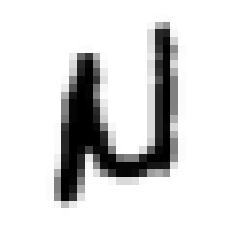

23


In [14]:
#이승훈
import cv2 as cv
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
ids=323445
X_new=X_train[ids]
y_new=y_train[ids]
c=X_new.reshape(28,28)


plt.imshow(c, cmap="binary")
plt.axis('off')
plt.show()
print(y_new)

In [15]:
kernel_size_row = 3
kernel_size_col = 2
kernel = np.ones((kernel_size_row, kernel_size_col), np.uint8)

erosion_image = cv.erode(X_new, kernel, iterations=1)  #// make erosion image

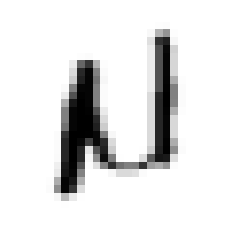

23


In [16]:
kernel_size_row = 3
kernel_size_col = 1
kernel = np.ones((kernel_size_row, kernel_size_col), np.uint8)

erosion_image = cv.erode(X_new, kernel, iterations=1)  #// make erosion image
c=erosion_image.reshape(28,28)


plt.imshow(c, cmap="binary")
plt.axis('off')
plt.show()
print(y_new)

# Prepare the data

In [17]:
#황성현
#data, batch size 성정
train_size=len(X_train)
valid_size=len(X_valid)
train_size

1951793

In [18]:
#황성현
X_train=np.reshape(X_train,[-1,784])
X_valid=np.reshape(X_valid,[-1,784])
X_train.shape,X_valid.shape

((1951793, 784), (164015, 784))

In [19]:
#황성현
y_train=np.reshape(y_train,[-1,1])
y_valid=np.reshape(y_valid,[-1,1])

y_train.shape,y_valid.shape

((1951793, 1), (164015, 1))

In [20]:
n_inputs = X_train.shape[-1]
print("n_inputs =",n_inputs)

n_inputs = 784


In [21]:
#황성현
def save_to_multiple_csv_files(data, name_prefix, rewrite, header=None, n_parts=10):
    
    Emnist_dir = os.path.join("../공용/datasets", "Emnist")
    os.makedirs(Emnist_dir, exist_ok=True)
    path_format = os.path.join(Emnist_dir, "my_{}_{:02d}.csv")

    filepaths = []
    m = len(data)
    for file_idx, row_indices in enumerate(np.array_split(np.arange(m), n_parts)):
        part_csv = path_format.format(name_prefix, file_idx)
        filepaths.append(part_csv)
        if rewrite:
            
            try:
                with open(part_csv, "wt", encoding="utf-8") as f:
                    if header is not None:
                        f.write(header)
                        f.write("\n")
                    for row_idx in row_indices:
                        f.write(",".join([repr(col) for col in data[row_idx]]))
                        f.write("\n")
            except:
                continue
        else:
            try:
                with open(part_csv, "xt", encoding="utf-8") as f:
                    if header is not None:
                        f.write(header)
                        f.write("\n")
                    for row_idx in row_indices:
                        f.write(",".join([repr(col) for col in data[row_idx]]))
                        f.write("\n")
            except:
                continue
    return filepaths

In [22]:
train_full=np.append(X_train,y_train,axis=1)

In [23]:
train_full.shape

(1951793, 785)

In [24]:
np.random.shuffle(train_full)

In [25]:
valid_full=np.append(X_valid,y_valid,axis=1)

In [26]:
#황성현
train_filepaths = save_to_multiple_csv_files(train_full, "train", n_parts=20,rewrite=False)

In [27]:
#황성현

valid_filepaths = save_to_multiple_csv_files(valid_full, "valid", n_parts=20,rewrite=False)

In [28]:
#황성현
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random

def dataaugmentation(X):
    datagen=ImageDataGenerator(rotation_range=40,width_shift_range = 0.2, 
        height_shift_range = 0.2)
    #영어 부분 2배 생성
    #차원변환 
    X=tf.reshape(X,[28,28,1])

    #새로운 데이터 생성
    angle=(random.random()%1)*np.pi/3-np.pi/6
    image_result =tfa.image.rotate(X, tf.constant(angle))#rotate -pi/8~ pi/8
    
    shift=(random.random()%1)*3 - 1.5
    image_result=tfa.image.translate(image_result,[tf.constant(shift),tf.constant(shift)])
    
    shear_x=(random.random()%1)*np.pi/5-np.pi/10
    
    #image_result=tfa.image.shear_x(image_result,shear_x,replace=255)
    #image_result=np.ndarray(image_result)
    #image_result = tf.keras.preprocessing.image.random_shear(image_result,0.2)
    
    
    kernel_size_row = random.randint(2, 3)
    kernel_size_col = random.randint(2, 3)
    kernel = np.ones((kernel_size_row, kernel_size_col,1), np.float32)

    #image_result = cv.erode(image_result, kernel, iterations=1)  #// make erosion image
    image_result=tf.reshape(image_result,[1,28,28,1])
    image_result = tf.nn.erosion2d(image_result, kernel, strides=(1, 1, 1, 1), padding="SAME", 
                                   data_format="NHWC", dilations=(1, 1, 1, 1))
    image_result=tf.reshape(image_result,[28,28,1])
    print(image_result.shape)
    image_result=tfa.image.gaussian_filter2d(image_result)
    
    return image_result

In [29]:
#황성현
@tf.function
def preprocess_mobilenet_v2(line,randomize=False,visualize=False):
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    fields = tf.io.decode_csv(line, record_defaults=defs)
    x = tf.stack(fields[:-1])
    x=tf.reshape(x,[28,28,1])
    y = tf.stack(fields[-1:])
    augment_image = x
    if y > 9 and randomize:
        augment_image = dataaugmentation(x)
        
        
    resized_image = tf.image.resize_with_pad(augment_image, 32,32)
    final_image = resized_image
    if visualize:
        final_image = keras.applications.mobilenet_v2.preprocess_input(resized_image)
    
    return final_image, y

@tf.function
def preprocess_resnet50(line,randomize=False):
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    fields = tf.io.decode_csv(line, record_defaults=defs)
    x = tf.stack(fields[:-1])
    x=tf.reshape(x,[28,28,1])
    y = tf.stack(fields[-1:])
    augment_image = x
    if y > 9 and randomize:
        augment_image = dataaugmentation(x)
        
        
    resized_image = tf.image.resize_with_pad(augment_image, [32,32])
    if resized_image.shape[2] == 1:
        temp=tf.concat([resized_image,resized_image],2)
        resized_image=tf.concat([temp,resized_image],2)
    final_image = keras.applications.resnet50.preprocess_input(resized_image)
    
    return final_image, y

@tf.function
def preprocess_vgg16(line,randomize=False):
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    fields = tf.io.decode_csv(line, record_defaults=defs)
    x = tf.stack(fields[:-1])
    x=tf.reshape(x,[28,28,1])
    y = tf.stack(fields[-1:])
    augment_image = x
    if y > 9 and randomize:
        augment_image = dataaugmentation(x)
        
        
    resized_image = tf.image.resize_with_pad(augment_image, [32,32])
    if resized_image.shape[2] == 1:
        temp=tf.concat([resized_image,resized_image],2)
        resized_image=tf.concat([temp,resized_image],2)
    final_image = keras.applications.vgg16.preprocess_input(resized_image)
    
    return final_image, y

@tf.function
def preprocess_renet(line,randomize=False):
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    fields = tf.io.decode_csv(line, record_defaults=defs)
    x = tf.stack(fields[:-1])
    x=tf.reshape(x,[28,28,1])
    y = tf.stack(fields[-1:])
    augment_image = x
    if y > 9 and randomize:
        augment_image = dataaugmentation(x)
        
   
    return augment_image, y

@tf.function
def preprocess_xception(line,randomize=False):
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    fields = tf.io.decode_csv(line, record_defaults=defs)
    x = tf.stack(fields[:-1])
    x=tf.reshape(x,[28,28,1])
    y = tf.stack(fields[-1:])
    augment_image = x
    if y > 9 and randomize:
        augment_image = dataaugmentation(x)
        
        
    resized_image = tf.image.resize_with_pad(augment_image, [32,32])
    if resized_image.shape[2] == 1:
        temp=tf.concat([resized_image,resized_image],2)
        resized_image=tf.concat([temp,resized_image],2)
    final_image = keras.applications.xception.preprocess_input(resized_image)
    
    return final_image, y

@tf.function
def preprocess_inception_v3(line,randomize=False):
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    fields = tf.io.decode_csv(line, record_defaults=defs)
    x = tf.stack(fields[:-1])
    x=tf.reshape(x,[28,28,1])
    y = tf.stack(fields[-1:])
    augment_image = x
    if y > 9 and randomize:
        augment_image = dataaugmentation(x)
        
        
    resized_image = tf.image.resize_with_pad(augment_image, [32,32])
    if resized_image.shape[2] == 1:
        temp=tf.concat([resized_image,resized_image],2)
        resized_image=tf.concat([temp,resized_image],2)
    final_image = keras.applications.inception_v3.preprocess_input(resized_image)
    
    return final_image, y

In [30]:
#황성현
from enum import Enum
class eModelName(Enum):
    mobilenet_v2 = 0,
    resnet50 = 1,
    vgg16 = 3,
    renet = 4,
    xception = 5,
    inception_v3 = 6
    

In [31]:
#황성현
from functools import partial
def csv_reader_dataset(filepaths, model_name, repeat=1, n_readers=5,
                       n_read_threads=None, shuffle_buffer_size=60000,
                       n_parse_threads=5, batch_size=32,randomize=True, visualize=False):
    dataset = tf.data.Dataset.list_files(filepaths).repeat(repeat)
    dataset = dataset.interleave(
        lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
        cycle_length=n_readers, num_parallel_calls=n_read_threads)
    dataset = dataset.shuffle(shuffle_buffer_size)
    if model_name == eModelName.mobilenet_v2:
        dataset = dataset.map(partial(preprocess_mobilenet_v2,randomize=randomize,visualize=visualize), 
                              num_parallel_calls=n_parse_threads)
        print(model_name.name)
    elif model_name == eModelName.resnet50:
        dataset = dataset.map(partial(preprocess_resnet50,randomize=randomize), num_parallel_calls=n_parse_threads)
        print(model_name.name)
    elif model_name == eModelName.vgg16:
        dataset = dataset.map(partial(preprocess_vgg16,randomize=randomize), num_parallel_calls=n_parse_threads)
        print(model_name.name)
    elif model_name == eModelName.renet:
        dataset = dataset.map(partial(preprocess_renet,randomize=randomize), num_parallel_calls=n_parse_threads)
        print(model_name.name)
    elif model_name == eModelName.xception:
        dataset = dataset.map(partial(preprocess_xception,randomize=randomize), num_parallel_calls=n_parse_threads)
        print(model_name.name)
    elif model_name == eModelName.inception_v3:
        dataset = dataset.map(partial(preprocess_inception_v3,randomize=randomize), num_parallel_calls=n_parse_threads)
        print(model_name.name)
    dataset = dataset.batch(batch_size)
    return dataset.prefetch(1)

In [32]:
#황성현
#csv_reader_dataset의 파라미터 model_name에 eModelNAme class의 맴버 변수 중 사용할 모델 입력
#ex) model_name = eModelName.inception_v3, model_name = eModelName.renet 
tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)
batch_size=64
train_set_aug = csv_reader_dataset(train_filepaths, model_name = eModelName.mobilenet_v2, batch_size=batch_size, repeat=None)
train_set_vis = csv_reader_dataset(train_filepaths, model_name = eModelName.mobilenet_v2, batch_size=batch_size, repeat=None,
                                     visualize=True)
valid_set = csv_reader_dataset(valid_filepaths, model_name = eModelName.mobilenet_v2, 
                               batch_size=batch_size, repeat=None, randomize = False)
train_set_aug,valid_set,train_set_vis

(28, 28, 1)
mobilenet_v2
(28, 28, 1)
mobilenet_v2
(28, 28, 1)
mobilenet_v2


(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>)

In [87]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

In [ ]:
count=0
for image_features in train_set_vis.unbatch().take(train_size):
    x,y=image_features
    print(y)
    plot_image(x/255)
    plt.show()
    if count>train_size:
        break
    count=count+1

# Train the model


In [32]:
strategy = tf.distribute.MirroredStrategy()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


# SMV2L

In [37]:
#황성현
class Inveted_Residual_Block(keras.layers.Layer):
    def __init__(self,c,s=1,t=1,n=1,**kwargs):
        super().__init__(**kwargs)
        self.activation = keras.layers.ReLU(max_value=6)
        self.main_layers = [
            
            ]
        self.strides_layers=[
           ]
        self.s=s
        self.t=t
        self.c=c
        self.n=n
        
    def build(self,batch_input_shape):
        #print(self.name,": batch_input_shape =",batch_input_shape)
        
        self.main_layers = [
            keras.layers.BatchNormalization(),
            keras.layers.Conv2D(filters=batch_input_shape[-1]*self.t, kernel_size=1,strides=1, 
                                padding="SAME", activation=self.activation),
            keras.layers.BatchNormalization(),
            keras.layers.DepthwiseConv2D(kernel_size=3, strides=1,padding="SAME", activation=self.activation),
            keras.layers.BatchNormalization(),
            keras.layers.Conv2D(filters=self.c,kernel_size=1, strides=1,padding="SAME",activation=None),
            ]
        self.strides_layers=[
            keras.layers.BatchNormalization(),
            keras.layers.Conv2D(filters=batch_input_shape[-1]*self.t, kernel_size=1,strides=1,
                                padding="SAME", activation=self.activation),
            keras.layers.BatchNormalization(),
            keras.layers.DepthwiseConv2D(kernel_size=3, strides=self.s,padding="SAME",activation=self.activation),
            keras.layers.BatchNormalization(),
            keras.layers.Conv2D(filters=self.c, kernel_size=1,strides=1,padding="SAME",activation=None),
        ]

    def call(self, inputs):
        Z = inputs
        
        for n in range(0,self.n):
            if n == 0:
                for layer in self.strides_layers:
                    Z = layer(Z)
            else:
                skip_Z = Z
                for layer in self.main_layers:
                    Z = layer(Z)
                
                Z += skip_Z
    
        return Z
    
    def get_config(self):
        base=super().get_config()
        return{**base,"s":self.s,"t":self.t,"c":self.c,"n":self.n}

In [38]:
#황성현
n_classes=62
smv2_l=keras.models.Sequential([
    keras.layers.BatchNormalization(input_shape=[32,32,1]),
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
    Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
    Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
    Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
    Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
    Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
    Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
    keras.layers.ReLU(max_value=6),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(n_classes,activation="softmax")
])
smv2_l.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 32, 32, 1)        4         
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        320       
                                                                 
 IRB1 (Inveted_Residual_Bloc  (None, 16, 16, 16)       2288      
 k)                                                              
                                                                 
 IRB2 (Inveted_Residual_Bloc  (None, 8, 8, 16)         6688      
 k)                                                              
                                                                 
 IRB3 (Inveted_Residual_Bloc  (None, 4, 4, 32)         19456     
 k)                                                   

In [39]:
#황성현
smv2_l.compile(loss="sparse_categorical_crossentropy",
                   optimizer=keras.optimizers.Nadam(learning_rate=0.002),
                   metrics=["accuracy"])

In [40]:
#황성현
from datetime import datetime
logs = "logs/" + datetime.now().strftime("SMV2L%Y%m%d-%H%M%S")
print(logs)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_last_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_nadam_last.h5",save_best_only=True)
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_nadam_best.h5",save_best_only=False)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
history=smv2_l.fit(train_set_aug, batch_size = batch_size,
                    steps_per_epoch=int(train_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(valid_size / batch_size),
                    epochs=300,callbacks=[tboard_callback, check_last_cb,check_best_cb, earlystop_cb])

logs/SMV2L20220721-143955
Epoch 1/300
30496/30496 [==============================] - 1942s 64ms/step - loss: 0.5239 - accuracy: 0.7763 - val_loss: 3.8427 - val_accuracy: 0.5317
Epoch 2/300
30496/30496 [==============================] - 1934s 63ms/step - loss: 0.4098 - accuracy: 0.8136 - val_loss: 1.6019 - val_accuracy: 0.6614
Epoch 3/300
30496/30496 [==============================] - 1938s 64ms/step - loss: 0.3862 - accuracy: 0.8234 - val_loss: 4.8639 - val_accuracy: 0.5036
Epoch 4/300
30496/30496 [==============================] - 1959s 64ms/step - loss: 0.3737 - accuracy: 0.8280 - val_loss: 6.0835 - val_accuracy: 0.4944
Epoch 5/300
30496/30496 [==============================] - 1955s 64ms/step - loss: 0.3659 - accuracy: 0.8319 - val_loss: 6.2358 - val_accuracy: 0.4983
Epoch 6/300
30496/30496 [==============================] - 1958s 64ms/step - loss: 0.3599 - accuracy: 0.8349 - val_loss: 6.1326 - val_accuracy: 0.4992
Epoch 7/300
30496/30496 [==============================] - 1941s 64m

In [31]:
smv2_l=keras.models.load_model("smv2l_nadam_last.h5a",custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})

IRB1 : batch_input_shape = (None, 112, 112, 32)
IRB2 : batch_input_shape = (None, 112, 112, 16)
IRB3 : batch_input_shape = (None, 56, 56, 16)
IRB4 : batch_input_shape = (None, 28, 28, 32)
IRB5 : batch_input_shape = (None, 14, 14, 64)
IRB6 : batch_input_shape = (None, 7, 7, 128)


In [32]:
#황성현
smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer="nadam",metrics=["accuracy"])

In [34]:
#황성현
from datetime import datetime
logs = "logs/" + datetime.now().strftime("SMV2L%Y%m%d-%H%M%S")
logs="logs/SMV2L20220525-150153"
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_last_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_nadam_last.h5",save_best_only=True)
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_nadam_best2.h5",save_best_only=False)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
history=smv2_l.fit(train_set, batch_size = batch_size,
                    steps_per_epoch=int(train_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(valid_size / batch_size),
                    epochs=300,callbacks=[tboard_callback, check_last_cb,check_best_cb, earlystop_cb])

Epoch 1/300
41552/41552 [==============================] - 8762s 211ms/step - loss: 0.3231 - accuracy: 0.8801 - val_loss: 1.0675 - val_accuracy: 0.7649
Epoch 2/300
41552/41552 [==============================] - 8739s 210ms/step - loss: 0.2940 - accuracy: 0.8895 - val_loss: 11.2437 - val_accuracy: 0.1270
Epoch 3/300
41552/41552 [==============================] - 8779s 211ms/step - loss: 0.3131 - accuracy: 0.8817 - val_loss: 1.6895 - val_accuracy: 0.7141 accuracy
Epoch 4/300
41552/41552 [==============================] - 8815s 212ms/step - loss: 0.3288 - accuracy: 0.8782 - val_loss: 4.8713 - val_accuracy: 0.3668
Epoch 5/300
41552/41552 [==============================] - 8759s 211ms/step - loss: 0.3198 - accuracy: 0.8804 - val_loss: 1.4416 - val_accuracy: 0.7255los
Epoch 6/300
41552/41552 [==============================] - 8648s 208ms/step - loss: 1.6377 - accuracy: 0.5769 - val_loss: 98.7684 - val_accuracy: 0.0070
Epoch 7/300
41552/41552 [==============================] - 8648s 208ms/ste

# SMV2P

In [41]:
#황성현
with strategy.scope():
    n_classes=62
    smv2_p=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=4,c=32,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_p.summary()
    smv2_p.compile(loss="sparse_categorical_crossentropy",
                   optimizer=keras.optimizers.Nadam(learning_rate=0.002),
                   metrics=["accuracy"])

NameError: name 'strategy' is not defined

In [ ]:
#황성현 
from datetime import datetime
logs = "logs/" + datetime.now().strftime("SMV2P%Y%m%d-%H%M%S")
print(logs)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2p_nadam_best.h5",save_best_only=True)
check_last_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2p_nadam_last.h5",save_best_only=False)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
history=smv2_p.fit(train_set_aug, batch_size = batch_size,
                    steps_per_epoch=int(train_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(valid_size / batch_size),
                    epochs=300,callbacks=[tboard_callback, check_best_cb, check_last_cb, earlystop_cb])

train SMV2P log in SMV2P&SMV2B.ipynb

# SMV2B

In [ ]:
#황성현

with strategy.scope():
    n_classes=62
    smv2_b=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=4,c=24,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=8,c=48,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_b.summary()
    smv2_b.compile(loss="sparse_categorical_crossentropy",
                   optimizer="nadam",
                   metrics=["accuracy"])

In [ ]:
#황성현 
from datetime import datetime
logs = "logs/" + datetime.now().strftime("SMV2B%Y%m%d-%H%M%S")
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2b_nadam_best.h5",save_best_only=True)
check_last_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2b_nadam_last.h5",save_best_only=False)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
#cm_callback = keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')

history=smv2_b.fit(train_set_aug, batch_size = batch_size,
                    steps_per_epoch=int(train_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(valid_size / batch_size),
                    epochs=300,callbacks=[tboard_callback, check_best_cb, check_last_cb, earlystop_cb])

train SMV2B log in SMV2P&SMV2B.ipynb

# Select the model

# SMV2L

In [38]:
#황성현 
smv2l=keras.models.load_model("smv2l_nadam_last.h5",custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})

IRB1 : batch_input_shape = (None, 112, 112, 32)
IRB2 : batch_input_shape = (None, 112, 112, 16)
IRB3 : batch_input_shape = (None, 56, 56, 16)
IRB4 : batch_input_shape = (None, 28, 28, 32)
IRB5 : batch_input_shape = (None, 14, 14, 64)
IRB6 : batch_input_shape = (None, 7, 7, 128)


In [39]:
#황성현 
smv2l.evaluate(valid_set,steps=int(valid_size / batch_size))

5125/5125 [==============================] - 136s 26ms/step - loss: 1.0651 - accuracy: 0.7656


[1.065091848373413, 0.7656341195106506]

# SMV2P

In [33]:
#황성현 
smv2p=keras.models.load_model("smv2p_nadam_best.h5",custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})

IRB1 : batch_input_shape = (None, 112, 112, 32)
IRB2 : batch_input_shape = (None, 112, 112, 16)
IRB3 : batch_input_shape = (None, 56, 56, 32)
IRB4 : batch_input_shape = (None, 28, 28, 64)
IRB5 : batch_input_shape = (None, 14, 14, 64)
IRB6 : batch_input_shape = (None, 7, 7, 128)


In [34]:
#황성현 
smv2p.evaluate(valid_set,steps=int(valid_size / batch_size))

5125/5125 [==============================] - 149s 28ms/step - loss: 1.3054 - accuracy: 0.7546


[1.305375337600708, 0.7546097636222839]

# SMV2B

In [35]:
#황성현 
mv2b=keras.models.load_model("smv2b_nadam_best.h5",custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})

IRB1 : batch_input_shape = (None, 112, 112, 32)
IRB2 : batch_input_shape = (None, 112, 112, 16)
IRB3 : batch_input_shape = (None, 56, 56, 24)
IRB4 : batch_input_shape = (None, 28, 28, 48)
IRB5 : batch_input_shape = (None, 14, 14, 64)
IRB6 : batch_input_shape = (None, 7, 7, 128)


In [36]:
#황성현 
smv2b.evaluate(valid_set,steps=int(valid_size / batch_size))

5125/5125 [==============================] - 158s 30ms/step - loss: 1.8271 - accuracy: 0.6875


[1.827067255973816, 0.6874512434005737]

# Fine Tune the model

# Batch size up

# Batch 64

In [ ]:
    #황성현
    #multygpu
    n_classes=62
    smv2_p=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_l.summary()
    smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer="nadam",metrics=["accuracy"])

In [ ]:
#천문성
from datetime import datetime
logs = "logs/" + datetime.now().strftime("SMV2L_BATCH64_%Y%m%d-%H%M%S")
print(logs)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
batch_size=64
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_nadam_batch64_best.h5",save_best_only=True)
check_last_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_nadam_batch64_last.h5",save_best_only=False)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
history=smv2_l.fit(X_train_resize,y_train, batch_size = batch_size,
                    validation_data=(X_valid_resize,y_valid),                   
                    epochs=300,callbacks=[tboard_callback, check_best_cb, check_last_cb, earlystop_cb])


train logs in SMV2L_batch_up.ipynb

In [17]:
smv2_l=keras.models.load_model("smv2l_nadam_batch64_best.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})
smv2_l.evaluate(X_valid_resize,y_valid)

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
5126/5126 [==============================] - 41s 7ms/step - loss: 0.3501 - accuracy: 0.8714


[0.3500642478466034, 0.8713958859443665]

# Batch 128

In [ ]:


n_classes=62
smv2_l=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
smv2_l.summary()
smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer="nadam",metrics=["accuracy"])

In [ ]:
#천문성
from datetime import datetime
logs = "logs/" + datetime.now().strftime("SMV2L_BATCH128_%Y%m%d-%H%M%S")
print(logs)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
batch_size=128
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_nadam_batch128_best.h5",save_best_only=True)
check_last_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_nadam_batch128_last.h5",save_best_only=False)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
history=smv2_l.fit(X_train_resize,y_train, batch_size = batch_size,
                    validation_data=(X_valid_resize,y_valid),                   
                    epochs=300,callbacks=[tboard_callback, check_best_cb, check_last_cb, earlystop_cb])


train logs in SMV2L_batch_up.ipynb

In [18]:
smv2_l=keras.models.load_model("smv2l_nadam_batch128_best.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})
smv2_l.evaluate(X_valid_resize,y_valid)

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
5126/5126 [==============================] - 36s 7ms/step - loss: 0.3537 - accuracy: 0.8674


[0.35373783111572266, 0.8674450516700745]

# Batch size up & Learning rateup

# smv2l when batch_size=64, lr=0.002 by minsung

In [21]:
#황성현
n_classes=62
smv2_l=keras.models.Sequential([
    keras.layers.BatchNormalization(input_shape=[32,32,1]),
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
    Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
    Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
    Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
    Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
    Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
    Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
    keras.layers.ReLU(max_value=6),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(n_classes,activation="softmax")
])
smv2_l.summary()

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_9 (Batch (None, 32, 32, 1)         4         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        320       
_________________________________________________________________
IRB1 (Inveted_Residual_Block (None, 16, 16, 16)        2288      
_________________________________________________________________
IRB2 (Inveted_Residual_Block (None, 8, 8, 16)          6688      
_________________________________________________________________
IRB3 (Inveted_Residual_Block (None, 4, 4, 32)    

In [22]:
opt = tf.keras.optimizers.Nadam(learning_rate=0.002)
batch_size=64
smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

In [ ]:


#황성현 
from datetime import datetime
logs = "logs/" + datetime.now().strftime("SMV2L_batch_64_lr_002%Y%m%d-%H%M%S")
print(logs)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')

check_cb=tf.keras.callbacks.ModelCheckpoint(filepath="SMV2L_batch_64_lr_002.h5",save_best_only=True)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
history=smv2_l.fit(X_train_resize,y_train, batch_size = batch_size,
                    validation_data=(X_valid_resize,y_valid),
                    epochs=300,callbacks=[tboard_callback, check_cb, earlystop_cb])



train logs in np_batch_lr_up_tunining.ipynb

In [ ]:
smv2_l=keras.models.load_model("SMV2L_batch_64_lr_002.h5",
                              custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})

In [31]:
smv2_l.evaluate(X_valid_resize,y_valid)

5126/5126 [==============================] - 37s 7ms/step - loss: 0.3861 - accuracy: 0.8584


[0.38609299063682556, 0.8584336638450623]

# smv2l when batch_size=256, lr=0.008 by minsung, seounghyun

In [33]:
#황성현
n_classes=62
smv2_l=keras.models.Sequential([
    keras.layers.BatchNormalization(input_shape=[32,32,1]),
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
    Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
    Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
    Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
    Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
    Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
    Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
    keras.layers.ReLU(max_value=6),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(n_classes,activation="softmax")
])
smv2_l.summary()

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_11 (Batc (None, 32, 32, 1)         4         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        320       
_________________________________________________________________
IRB1 (Inveted_Residual_Block (None, 16, 16, 16)        2288      
_________________________________________________________________
IRB2 (Inveted_Residual_Block (None, 8, 8, 16)          6688      
_________________________________________________________________
IRB3 (Inveted_Residual_Block (None, 4, 4, 32)    

In [34]:
opt = tf.keras.optimizers.Nadam(learning_rate=0.008)
batch_size=256
smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

In [ ]:
#황성현 
from datetime import datetime
logs = "logs/" + datetime.now().strftime("SMV2L_batch_256_lr_008%Y%m%d-%H%M%S")
print(logs)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')

check_cb=tf.keras.callbacks.ModelCheckpoint(filepath="SMV2L_batch_256_lr_008.h5",save_best_only=True)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
history=smv2_l.fit(X_train_resize,y_train, batch_size = batch_size,
                    validation_data=(X_valid_resize,y_valid),
                    epochs=300,callbacks=[tboard_callback, check_cb, earlystop_cb])

train logs in np_batch_lr_up_tunining.ipynb

In [35]:
smv2_l=keras.models.load_model("SMV2L_batch_256_lr_008.h5",
                              custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)


In [36]:
smv2_l.evaluate(X_valid_resize,y_valid)

5126/5126 [==============================] - 34s 6ms/step - loss: 0.4856 - accuracy: 0.8300


[0.4856473207473755, 0.8299667835235596]

valid loss is not good. but in train logs, this model arrived 80% accuracy fastly, so we decided use this with learning rate schedular

In [37]:
#황성현
n_classes=62
smv2_l=keras.models.Sequential([
    keras.layers.BatchNormalization(input_shape=[32,32,1]),
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
    Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
    Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
    Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
    Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
    Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
    Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
    keras.layers.ReLU(max_value=6),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(n_classes,activation="softmax")
])
smv2_l.summary()

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_13 (Batc (None, 32, 32, 1)         4         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 32)        320       
_________________________________________________________________
IRB1 (Inveted_Residual_Block (None, 16, 16, 16)        2288      
_________________________________________________________________
IRB2 (Inveted_Residual_Block (None, 8, 8, 16)          6688      
_________________________________________________________________
IRB3 (Inveted_Residual_Block (None, 4, 4, 32)    

In [38]:
opt = tf.keras.optimizers.Nadam(learning_rate=0.008)
batch_size=256
smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

In [ ]:
#황성현 
from datetime import datetime
logs = "logs/" + datetime.now().strftime("SMV2L_batch_256_lr_008_sch_exp%Y%m%d-%H%M%S")
print(logs)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
def scheduler(epoch, lr):
    if epoch < 2:
        return lr
    else:
        return lr * tf.math.exp(-0.1)
lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
check_cb=tf.keras.callbacks.ModelCheckpoint(filepath="SMV2L_batch_256_lr_008_sch_exp.h5",save_best_only=True)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
history=smv2_l.fit(X_train_resize,y_train, batch_size = batch_size,
                    validation_data=(X_valid_resize,y_valid),
                    epochs=300,callbacks=[tboard_callback, check_cb, earlystop_cb,lr_callback])

train logs in np_batch_lr_up_tunining.ipynb

In [41]:
smv2_l=keras.models.load_model("SMV2L_batch_256_lr_008_sch_exp.h5",
                              custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)


In [43]:
smv2_l.evaluate(X_valid_resize,y_valid,batch_size=256)

641/641 [==============================] - 5s 8ms/step - loss: 0.3488 - accuracy: 0.8723


[0.34879040718078613, 0.872304379940033]

it arrived 87% accuracy faster than 32 batch size, 0.001 learning rate. So we try to finetune with batch size up learning rate up 

# Optimizer 

finetuning - optimizer logs in np_SMV2_optimizer.ipynb

nadam

In [ ]:
#황성현
#multygpu
with strategy.scope():
    n_classes=62
    smv2_l=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_l.summary()
    smv2_l.compile(loss="sparse_categorical_crossentropy",
                   optimizer=keras.optimizers.Nadam(learning_rate=0.002),
                   metrics=["accuracy"])

In [ ]:
#황성현
from datetime import datetime
logs = "logs/" + datetime.now().strftime("SMV2L_NP%Y%m%d-%H%M%S")
print(logs)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_nadam_np_best.h5",save_best_only=True)
check_last_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_nadam_np_last.h5",save_best_only=False)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
lr_callback=keras.callbacks.ReduceLROnPlateau(patience=5, factor=0.5)
history=smv2_l.fit(train_set_aug, batch_size = batch_size,
                    steps_per_epoch=int(train_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(valid_size / batch_size),
                    epochs=300,callbacks=[tboard_callback, check_best_cb, check_last_cb, earlystop_cb])

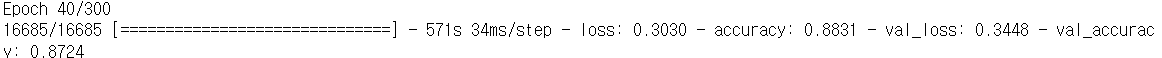
best log

adam

In [ ]:

    n_classes=62
    smv2_l=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_l.summary()
    smv2_l.compile(loss="sparse_categorical_crossentropy",
                   optimizer=keras.optimizers.Adam(learning_rate=0.002),
                   metrics=["accuracy"])

In [ ]:
#황성현
from datetime import datetime
logs = "logs/" + datetime.now().strftime("SMV2L_ADAM%Y%m%d-%H%M%S")
print(logs)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_adam_best.h5",save_best_only=True)
check_last_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_adam_last.h5",save_best_only=False)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
lr_callback=keras.callbacks.ReduceLROnPlateau(patience=5, factor=0.4)
history=smv2_l.fit(train_set_aug, batch_size = batch_size,
                    steps_per_epoch=int(train_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(valid_size / batch_size),
                    epochs=300,callbacks=[tboard_callback, check_best_cb, check_last_cb, earlystop_cb])

In [70]:
smv2_l=keras.models.load_model("smv2l_adam_np_best.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})
smv2_l.evaluate(X_valid_resize,y_valid,batch_size=32)

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
5126/5126 [==============================] - 28s 5ms/step - loss: 0.3377 - accuracy: 0.8751


[0.3376833498477936, 0.875054121017456]

rmsprop

In [ ]:
#황성현
#multygpu
with strategy.scope():
    n_classes=62
    smv2_l=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_l.summary()
    smv2_l.compile(loss="sparse_categorical_crossentropy",
                   optimizer=keras.optimizers.RMSprop(learning_rate=0.002),
                   metrics=["accuracy"])

In [ ]:
#황성현
from datetime import datetime
batch_size=32
logs = "logs/" + datetime.now().strftime("SMV2L_RMSPROP%Y%m%d-%H%M%S")
print(logs)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_rmsprop_best.h5",save_best_only=True)
check_last_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_rmsprop_last.h5",save_best_only=False)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
lr_callback=keras.callbacks.ReduceLROnPlateau(patience=5, factor=0.4)
history=smv2_l.fit(train_set_aug, batch_size = batch_size,
                    steps_per_epoch=int(train_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(valid_size / batch_size),
                    epochs=300,callbacks=[tboard_callback, check_best_cb, check_last_cb, earlystop_cb])

In [71]:
smv2_l=keras.models.load_model("smv2l_rmsprop_np_best.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})
smv2_l.evaluate(X_valid_resize,y_valid)

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
5126/5126 [==============================] - 29s 6ms/step - loss: 0.3403 - accuracy: 0.8740


[0.3402675986289978, 0.874029815196991]

neg

In [ ]:
#황성현
#multygpu
with strategy.scope():
    n_classes=62
    smv2_l=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_l.summary()
    smv2_l.compile(loss="sparse_categorical_crossentropy",
                   optimizer=keras.optimizers.SGD(learning_rate=0.02,momentum=0.9,nesterov=True)
                   ,metrics=["accuracy"])

In [ ]:
#황성현
from datetime import datetime
batch_size=32
logs = "logs/" + datetime.now().strftime("SMV2L_NAG%Y%m%d-%H%M%S")
print(logs)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_nag_best.h5",save_best_only=True)
check_last_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_nag_last.h5",save_best_only=False)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
lr_callback=keras.callbacks.ReduceLROnPlateau(patience=5, factor=0.4)
history=smv2_l.fit(train_set_aug, batch_size = batch_size,
                    steps_per_epoch=int(train_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(valid_size / batch_size),
                    epochs=300,callbacks=[tboard_callback, check_best_cb, check_last_cb, earlystop_cb])

In [108]:
smv2_l=keras.models.load_model("smv2l_nag_np_best.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})
smv2_l.evaluate(X_valid_resize,y_valid)

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
5126/5126 [==============================] - 40s 8ms/step - loss: 869.7309 - accuracy: 0.0043


[869.7308959960938, 0.004267902113497257]

Momentum

In [ ]:
#황성현
#multygpu
with strategy.scope():
    n_classes=62
    smv2_l=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_l.summary()
    smv2_l.compile(loss="sparse_categorical_crossentropy",
                   optimizer=keras.optimizers.SGD(learning_rate=0.02,momentum=0.9)
                   ,metrics=["accuracy"])

In [ ]:
#황성현
from datetime import datetime
batch_size=32
logs = "logs/" + datetime.now().strftime("SMV2P_NP_MOMENTUM%Y%m%d-%H%M%S")
print(logs)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_momentum_np_best.h5",save_best_only=True)
check_last_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_momentum_np_last.h5",save_best_only=False)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
lr_callback=keras.callbacks.ReduceLROnPlateau(patience=5, factor=0.4)
history=smv2_l.fit(train_set_aug, batch_size = batch_size,
                    steps_per_epoch=int(train_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(valid_size / batch_size),
                    epochs=300,callbacks=[tboard_callback, check_best_cb, check_last_cb, earlystop_cb])

In [73]:
smv2_l=keras.models.load_model("smv2l_momentum_np_best.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})
smv2_l.evaluate(X_valid_resize,y_valid)

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
5126/5126 [==============================] - 28s 5ms/step - loss: 0.3524 - accuracy: 0.8695


[0.35244783759117126, 0.8694936633110046]

adam is best!

smv2p

# augmentation + learning rate schedular + adam + batchup learningrate up

ReduceLROnPlateau

In [ ]:
    #전민재
    #multygpu

    opt = tf.keras.optimizers.Adam(learning_rate=0.006)
    batch_size=256
    n_classes=62
    smv2_l=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_l.summary()
    smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

In [ ]:
#황성현 
from datetime import datetime
logs = "logs/" + datetime.now().strftime("SMV2L_lrsch_plat_aug_adam_%Y%m%d-%H%M%S")
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=3, min_lr=0.000001)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_nadam_best_lrsch_plat_aug_adam.h5",save_best_only=True)
check_last_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_nadam_last_lrsch_plat_aug_adam.h5",save_best_only=False)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
history=smv2_l.fit(X_train_aug,y_train_aug,
                   validation_data=(X_valid_final,y_valid),batch_size = batch_size, 
                   epochs=300,callbacks=[tboard_callback, check_best_cb, check_last_cb, earlystop_cb,reduce_lr])

train logs in smv2l_adam_best_lrsch_plat_aug.ipynb

In [ ]:
smv2_l=keras.models.load_model("smv2l_nadam_best_lrsch_plat_aug_adam.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})
smv2_l.evaluate(X_valid_resize,y_valid)

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
 521/5126 [==>...........................] - ETA: 42s - loss: 0.3466 - accuracy: 0.8706

change batch_size 128, learning rate 0.003

In [ ]:
    #황성현
    #multygpu


    n_classes=62
    smv2_l=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_l.summary()
    opt = tf.keras.optimizers.Adam(learning_rate=0.003)
    batch_size=128
    smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

In [ ]:
#황성현 
from datetime import datetime
logs = "logs/" + datetime.now().strftime("SMV2L_lrsch_plat_aug128%Y%m%d-%H%M%S")
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=3, min_lr=0.000001)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_nadam_best_lrsch_plat_aug128.h5",save_best_only=True)
check_last_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_nadam_last_lrsch_plat_aug128.h5",save_best_only=True)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
history=smv2_l.fit(X_train_aug,y_train_aug,
                   validation_data=(X_valid_final,y_valid),batch_size = batch_size, 
                   epochs=300,callbacks=[tboard_callback, check_best_cb, check_last_cb, earlystop_cb,reduce_lr])

train logs in smv2l_adam_lrsch_plat_aug_128.ipynb

In [49]:
smv2_l=keras.models.load_model("smv2l_adam_lrsch_plat_aug128.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})
smv2_l.evaluate(X_valid_resize,y_valid)

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
5126/5126 [==============================] - 39s 8ms/step - loss: 0.3390 - accuracy: 0.8745


[0.3389529585838318, 0.8744931817054749]

Onecycle

In [106]:
#전민재
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [ ]:
    #황성현 전민재
    #multygpu


    n_classes=62
    smv2_l=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_l.summary()
    opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
    batch_size=128
    smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

In [ ]:
#황성현 전민재
from datetime import datetime
K = keras.backend
logs = "logs/" + datetime.now().strftime("SMV2L_lrsch_onecycle_aug128%Y%m%d-%H%M%S")
epochs=50
onecycle = OneCycleScheduler(len(X_train) // batch_size * epochs, max_rate=0.003)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_adam_best_lrsch_onecycle_aug128.h5",save_best_only=True)

history=smv2_l.fit(X_train_aug,y_train_aug,
                   validation_data=(X_valid_final,y_valid),batch_size = batch_size, 
                   epochs=epochs,callbacks=[tboard_callback, check_best_cb,onecycle])

train logs in smv2l_adam_lrsch_onecycle_aug_128.ipynb

In [26]:
smv2_l=keras.models.load_model("smv2l_adam_lrsch_onecycle_aug128.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})
smv2_l.evaluate(X_valid_resize,y_valid)

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
5126/5126 [==============================] - 40s 8ms/step - loss: 0.3331 - accuracy: 0.8774


[0.33308178186416626, 0.8774136304855347]

# Drop out

In [ ]:
    #황성현 전민재
    #multygpu


    n_classes=62
    smv2_l=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_l.summary()
    opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
    batch_size=128
    smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

In [ ]:
#황성현 전민재
from datetime import datetime
K = keras.backend
logs = "logs/" + datetime.now().strftime("SMV2L_lrsch_onecycle_aug_dropout_128%Y%m%d-%H%M%S")
onecycle = OneCycleScheduler(len(X_train) // batch_size * 50, max_rate=0.003)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_adam_best_lrsch_onecycle_aug_dropout_128.h5",save_best_only=True)

history=smv2_l.fit(X_train_aug,y_train_aug,
                   validation_data=(X_valid_final,y_valid),batch_size = batch_size, 
                   epochs=50,callbacks=[tboard_callback, check_best_cb,onecycle])

train logs in smv2l_adam_lrsch_onecycle_aug_dropout128.ipynb

In [28]:
smv2_l=keras.models.load_model("smv2l_adam_lrsch_onecycle_aug_dropout_128.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})
smv2_l.evaluate(X_valid_resize,y_valid)

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
5126/5126 [==============================] - 40s 8ms/step - loss: 0.3265 - accuracy: 0.8785


[0.3265077769756317, 0.8784623146057129]

change epochs 40

In [ ]:
    #황성현 전민재
    #multygpu


    n_classes=62
    smv2_l=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_l.summary()
    opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
    batch_size=128
    smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

In [ ]:
#황성현 전민재
from datetime import datetime
K = keras.backend
logs = "logs/" + datetime.now().strftime("SMV2L_lrsch_onecycle_aug_dropout_128_epoch40%Y%m%d-%H%M%S")
epochs=40
onecycle = OneCycleScheduler(len(X_train) // batch_size * epochs, max_rate=0.003)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_adam_best_lrsch_onecycle_aug_dropout_128_epoch40.h5",save_best_only=True)

history=smv2_l.fit(X_train_aug,y_train_aug,
                   validation_data=(X_valid_final,y_valid),batch_size = batch_size,
                   epochs=epochs,callbacks=[tboard_callback, check_best_cb,onecycle])

train logs in smv2l_adam_lrsch_onecycle_aug_dropout128_epoch40.ipynb

In [41]:
smv2_l=keras.models.load_model("smv2l_adam_lrsch_onecycle_aug_dropout_128_epoch40.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})
smv2_l.evaluate(X_valid_resize,y_valid)

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
5126/5126 [==============================] - 39s 8ms/step - loss: 0.3291 - accuracy: 0.8782


[0.3291375935077667, 0.8781574964523315]

At seleting model step, we see that smv2l,much simple than smv2p, is better than smv2p. So, how about making more simple model?

# IRB6 512

In [4]:
    #황성현 전민재 IRB6512
    #multygpu


    n_classes=62
    smv2_l=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=8,c=512,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_l.summary()
    opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
    batch_size=128
    smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Batc  (None, 32, 32, 1)        4         
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        320       
                                                                 
 IRB1 (Inveted_Residual_Bloc  (None, 16, 16, 16)       2288      
 k)                                                              
                                                                 
 IRB2 (Inveted_Residual_Bloc  (None, 8, 8, 16)     

In [ ]:
#황성현 전민재
from datetime import datetime
K = keras.backend
logs = "logs/" + datetime.now().strftime("SMV2L_lrsch_onecycle_aug_dropout_128_he_irb6_512%Y%m%d-%H%M%S")
onecycle = OneCycleScheduler(len(X_train) // batch_size * 50, max_rate=0.003)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_adam_best_lrsch_onecycle_aug_dropout_128_he_irb6_512.h5",save_best_only=True)

history=smv2_l.fit(X_train,y_train,
                   validation_data=(X_valid_resize,y_valid),batch_size = batch_size, 
                   epochs=50,callbacks=[tboard_callback, check_best_cb,onecycle])

train logs in smv2l_adam_lrsch_onecycle_aug_dropout128_he_irb6_512

In [8]:
smv2_l=keras.models.load_model("smv2l_adam_lrsch_onecycle_aug_dropout_128_he_irb6_512.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})
smv2_l.evaluate(X_valid_resize,y_valid)

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)


2022-06-12 03:37:19.865088: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8204


5126/5126 [==============================] - 67s 12ms/step - loss: 0.3281 - accuracy: 0.8778


[0.328132301568985, 0.8778160810470581]

change epochs to 30

In [ ]:
    #황성현 전민재 IRB6512
    #multygpu


    n_classes=62
    smv2_l=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=8,c=512,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_l.summary()
    opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
    batch_size=128
    smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

In [ ]:
#황성현 전민재
from datetime import datetime
K = keras.backend
logs = "logs/" + datetime.now().strftime("SMV2L_lrsch_onecycle_aug_dropout_128_he_irb6_512_epoch40%Y%m%d-%H%M%S")
onecycle = OneCycleScheduler(len(X_train) // batch_size * 30, max_rate=0.003)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_adam_best_lrsch_onecycle_aug_dropout_128_he_irb6_512_epoch40.h5",save_best_only=True)

history=smv2_l.fit(X_train,y_train,
                   validation_data=(X_valid_resize,y_valid),batch_size = batch_size,
                   epochs=30,callbacks=[tboard_callback, check_best_cb,onecycle])

train logs in smv2l_adam_lrsch_onecycle_aug_dropout128_he_irb6_512_epoch30.ipynb

In [14]:
smv2_l=keras.models.load_model("smv2l_adam_lrsch_onecycle_aug_dropout_128_he_irb6_512_epoch30.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})
smv2_l.evaluate(X_valid_resize,y_valid)

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
5126/5126 [==============================] - 61s 12ms/step - loss: 0.3266 - accuracy: 0.8783


[0.3266333043575287, 0.878279447555542]

change epochs to 40

In [ ]:
    #황성현 전민재 IRB6512
    #multygpu


    n_classes=62
    smv2_l=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=8,c=512,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_l.summary()
    opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
    batch_size=128
    smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

In [ ]:
#황성현 전민재
from datetime import datetime
K = keras.backend
logs = "logs/" + datetime.now().strftime("SMV2L_lrsch_onecycle_aug_dropout_128_he_irb6_512_epoch40%Y%m%d-%H%M%S")
onecycle = OneCycleScheduler(len(X_train) // batch_size * 40, max_rate=0.003)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_adam_best_lrsch_onecycle_aug_dropout_128_he_irb6_512_epoch40.h5",save_best_only=True)

history=smv2_l.fit(X_train,y_train,
                   validation_data=(X_valid_resize,y_valid),batch_size = batch_size, 
                   epochs=40,callbacks=[tboard_callback, check_best_cb,onecycle])

train logs in smv2l_adam_lrsch_onecycle_aug_dropout128_he_irb6_512_epoch40.ipynb

In [10]:
smv2_l=keras.models.load_model("smv2l_adam_lrsch_onecycle_aug_dropout_128_he_irb6_512_epoch40.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})
smv2_l.evaluate(X_valid_resize,y_valid)

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
5126/5126 [==============================] - 61s 12ms/step - loss: 0.3293 - accuracy: 0.8785


[0.3292776644229889, 0.8784501552581787]

change epochs to 70

In [ ]:
    #황성현 전민재 IRB6512
    #multygpu


    n_classes=62
    smv2_l=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=8,c=512,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_l.summary()
    opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
    batch_size=128
    smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

In [ ]:
#황성현 전민재
from datetime import datetime
K = keras.backend
logs = "logs/" + datetime.now().strftime("SMV2L_lrsch_onecycle_aug_dropout_128_he_irb6_512_epoch70%Y%m%d-%H%M%S")
onecycle = OneCycleScheduler(len(X_train) // batch_size * 70, max_rate=0.003)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_adam_best_lrsch_onecycle_aug_dropout_128_he_irb6_512_epoch70.h5",save_best_only=True)

history=smv2_l.fit(X_train,y_train,
                   validation_data=(X_valid_resize,y_valid),batch_size = batch_size, 
                   epochs=70,callbacks=[tboard_callback, check_best_cb,onecycle])

train logs in smv2l_adam_lrsch_onecycle_aug_dropout128_he_irb6_512_epoch70.ipynb

# 이거실행 4

In [11]:
smv2_l=keras.models.load_model("smv2l_adam_lrsch_onecycle_aug_dropout_128_he_irb6_512_epoch70.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})
smv2_l.evaluate(X_valid_resize,y_valid)
#smv2l_adam_lrsch_onecycle_aug_dropout128_he_irb6_512_epoch70.ipynb 참조

OSError: No file or directory found at smv2l_adam_lrsch_onecycle_aug_dropout_128_he_irb6_512_epoch70.h5

40 epochs is best!

# SMV2SL + preprocess input

In [ ]:
    #황성현 전민재 IRB6512, maxlr 0.002
    #multygpu


    n_classes=62
    smv2_l=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=2,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=4,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=4,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=4,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=4,c=512,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_l.summary()
    opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
    batch_size=128
    smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

In [ ]:
#황성현 전민재
from datetime import datetime
K = keras.backend
epochs=40
logs = "logs/" + datetime.now().strftime("smv2l_adam_best_lrsch_onecycle_aug_dropout_128_he_irb6_512_t4_epoch40%Y%m%d-%H%M%S")
print(logs)
onecycle = OneCycleScheduler(len(X_train_resize) // batch_size * epochs, max_rate=0.003)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_adam_best_lrsch_onecycle_aug_dropout_128_he_irb6_512_t4_epoch40.h5",save_best_only=True)

history=smv2_l.fit(X_train_aug,y_train_aug,
                   validation_data=(X_valid_final,y_valid),batch_size = batch_size, 
                   epochs=epochs,callbacks=[tboard_callback, check_best_cb,onecycle])

train logs in smv2sl_adam_lrsch_onecycle_aug_dropout_epoch40.lpynb

In [35]:
smv2_l=keras.models.load_model("smv2l_adam_best_lrsch_onecycle_aug_dropout_128_he_irb6_512_t4_epoch40.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})
smv2_l.evaluate(X_valid_final,y_valid)

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
5126/5126 [==============================] - 39s 7ms/step - loss: 0.3349 - accuracy: 0.8773


[0.3349411189556122, 0.8773038983345032]

# SMV2SL + preprocess input + 1x1 conv2d linear activation + Swap BN and Activation positions

In [75]:
#황성현 
class Inveted_Residual_Block2(keras.layers.Layer):
    def __init__(self,c,s=1,t=1,n=1,**kwargs):
        super().__init__(**kwargs)
        self.activation = keras.layers.ReLU(max_value=6)
        self.main_layers = [
            
            ]
        self.strides_layers=[
           ]
        self.s=s
        self.t=t
        self.c=c
        self.n=n
        
    def build(self,batch_input_shape):
        print(self.name,": batch_input_shape =",batch_input_shape)
        initializer = tf.keras.initializers.HeNormal()
        self.main_layers = [
            keras.layers.BatchNormalization(),
            keras.layers.Conv2D(filters=batch_input_shape[-1]*self.t, kernel_size=1,strides=1, kernel_initializer=initializer,
                                padding="SAME"),
            keras.layers.BatchNormalization(),
            self.activation,
            keras.layers.DepthwiseConv2D(kernel_size=3, strides=1,padding="SAME",kernel_initializer=initializer),
            keras.layers.BatchNormalization(),
            self.activation,
            keras.layers.Conv2D(filters=self.c,kernel_size=1, strides=1,padding="SAME",kernel_initializer=initializer),
            ]
        self.strides_layers=[
            keras.layers.BatchNormalization(),
            keras.layers.Conv2D(filters=batch_input_shape[-1]*self.t, kernel_size=1,strides=1,kernel_initializer=initializer,
                                padding="SAME"),
            keras.layers.BatchNormalization(),
            self.activation,
            keras.layers.DepthwiseConv2D(kernel_size=3, strides=self.s,padding="SAME",kernel_initializer=initializer),
            keras.layers.BatchNormalization(),
            self.activation,
            keras.layers.Conv2D(filters=self.c, kernel_size=1,strides=1,padding="SAME",kernel_initializer=initializer),
        ]

    def call(self, inputs):
        Z = inputs
        
        for n in range(0,self.n):
            if n == 0:
                for layer in self.strides_layers:
                    Z = layer(Z)
            else:
                skip_Z = Z
                for layer in self.main_layers:
                    Z = layer(Z)
                
                Z += skip_Z
    
        return Z
    
    def get_config(self):
        base=super().get_config()
        return{**base,"s":self.s,"t":self.t,"c":self.c,"n":self.n}

In [81]:
    #이승훈 황성현
    #SMV2SL

n_classes=62
smv2_SL=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block2(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block2(t=2,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block2(t=4,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block2(t=4,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block2(t=4,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block2(t=4,c=512,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    
smv2_SL.summary()
opt = tf.keras.optimizers.Adam(learning_rate=0.003)
batch_size=128
smv2_SL.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_6 (Batc  (None, 32, 32, 1)        4         
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        320       
                                                                 
 IRB1 (Inveted_Residual_Bloc  (None, 16, 16, 16)       2288      
 k2)                                                             
                                                                 
 IRB2 (Inveted_Residual_Bloc  (None, 8, 8, 16)   

In [82]:
#황성현
#csv_reader_dataset의 파라미터 model_name에 eModelNAme class의 맴버 변수 중 사용할 모델 입력
#ex) model_name = eModelName.inception_v3, model_name = eModelName.renet 
tf.random.set_seed(42)
random.seed(42)
train_set = csv_reader_dataset(train_filepaths, model_name = eModelName.mobilenet_v2, batch_size=batch_size, repeat=None)
valid_set = csv_reader_dataset(valid_filepaths, model_name = eModelName.mobilenet_v2, 
                               batch_size=batch_size, repeat=None, randomize = False)
train_set,valid_set

mobilenet_v2
mobilenet_v2


(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>)

In [83]:
#전민재
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [ ]:
#황성현 전민재
from datetime import datetime
K = keras.backend
epochs=1000
logs = "logs/" + datetime.now().strftime("SMV2SL_adam_best_lrsch_onecycle_aug_epoch40%Y%m%d-%H%M%S")
print(logs)
onecycle = OneCycleScheduler(train_size // batch_size * epochs, max_rate=0.003)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="SMV2SL_adam_best_lrsch_onecycle_aug_epoch40.h5",save_best_only=True)
check_last_cb=tf.keras.callbacks.ModelCheckpoint(filepath="SMV2SL_adam_last_lrsch_onecycle_aug_epoch40.h5",save_best_only=False)

history=smv2_SL.fit(train_set, batch_size = batch_size,
                    steps_per_epoch=int(train_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(valid_size / batch_size),
                    epochs=epochs,callbacks=[ check_last_cb,check_best_cb,onecycle])

logs/SMV2SL_adam_best_lrsch_onecycle_aug_epoch4020220711-160257
Epoch 1/1000
15248/15248 [==============================] - 604s 39ms/step - loss: 0.3691 - accuracy: 0.8846 - val_loss: 3.4463 - val_accuracy: 0.5712
Epoch 2/1000
15248/15248 [==============================] - 611s 40ms/step - loss: 0.2071 - accuracy: 0.9299 - val_loss: 7.4130 - val_accuracy: 0.5045
Epoch 3/1000
15248/15248 [==============================] - 621s 41ms/step - loss: 0.1593 - accuracy: 0.9480 - val_loss: 5.9690 - val_accuracy: 0.5216
Epoch 4/1000
15248/15248 [==============================] - 630s 41ms/step - loss: 0.1595 - accuracy: 0.9424 - val_loss: 5.2438 - val_accuracy: 0.5243
Epoch 5/1000
15248/15248 [==============================] - 642s 42ms/step - loss: 0.1794 - accuracy: 0.9341 - val_loss: 4.3847 - val_accuracy: 0.5469
Epoch 6/1000
15248/15248 [==============================] - 642s 42ms/step - loss: 0.1746 - accuracy: 0.9351 - val_loss: 4.4242 - val_accuracy: 0.5376
Epoch 7/1000
15248/15248 [====

train logs in SMV2SL.ipynb

In [46]:
smv2_l=keras.models.load_model("SMV2SL_adam_best_lrsch_onecycle_aug_epoch40.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block2})
smv2_l.evaluate(X_valid_final,y_valid)

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
5126/5126 [==============================] - 38s 7ms/step - loss: 0.3275 - accuracy: 0.8801


[0.32748278975486755, 0.8801146149635315]

In [ ]:
    #황성현 전민재 IRB61024, maxlr 0.003
    #multygpu


    n_classes=62
    smv2_l=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=2,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=4,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=4,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=4,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=4,c=1024,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_l.summary()
    opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
    batch_size=32
    smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

In [ ]:
#황성현 전민재
from datetime import datetime
K = keras.backend
epochs=40                                 
logs = "logs/" + datetime.now().strftime("SMV2L_lrsch_onecycle001_dropout_128_he_irb6_1024_epoch40%Y%m%d-%H%M%S")
onecycle = OneCycleScheduler(len(X_train_resize) // batch_size * epochs, max_rate=0.001,start_rate=0.0003)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2sl_adam_lrsch_onecycle_batch32_lr0.001_epoch40.h5",save_best_only=True)

history=smv2_l.fit(X_train,y_train,
                   validation_data=(X_valid_final,y_valid),batch_size = batch_size, 
                   epochs=epochs,callbacks=[tboard_callback, check_best_cb,onecycle])

In [50]:
smv2_l=keras.models.load_model("smv2sl_adam_lrsch_onecycle_batch32_lr0.001_epoch40.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block2})
smv2_l.evaluate(X_valid_final,y_valid)

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
5126/5126 [==============================] - 40s 8ms/step - loss: 0.3219 - accuracy: 0.8802


[0.32189807295799255, 0.8801512122154236]

smv2sl_adam_lrsch_onecycle_batch32_lr0.001_epoch40 is best model!

# lerning curve 

In [12]:
%load_ext tensorboard

In [13]:
%tensorboard --logdir logs/SMV2L_lrsch_onecycle001_dropout_128_he_irb6_1024_epoch40

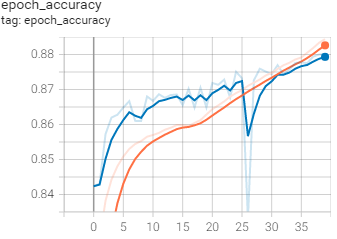

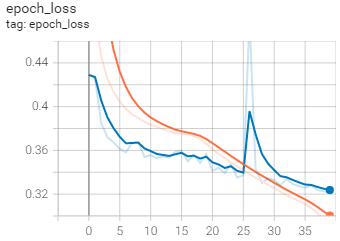

# test the model

In [75]:
best_model=keras.models.load_model("smv2sl_adam_lrsch_onecycle_batch32_lr0.001_epoch40.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block2})

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)


In [76]:
best_model.evaluate(X_test_final,y_test)

3636/3636 [==============================] - 28s 8ms/step - loss: 0.3187 - accuracy: 0.8796


[0.3186957836151123, 0.8795766830444336]

0.1204 error rate

# test with handwrite model

In [84]:
#이승훈

loaded_data=np.loadtxt('./datasets/Emnist/Estela_ExtendMnist-1.csv', delimiter=",",dtype='uint8')
y_estela_full,X_estela_full=np.split(loaded_data,[1],axis=1)
np.savetxt('./datasets/Emnist/estela_data.csv',X_estela_full,fmt='%d',delimiter=',')
np.savetxt('./datasets/Emnist/estela_label.csv',y_estela_full,fmt='%d',delimiter=',')

In [99]:
#황성현, jmj
X_estela=np.reshape(X_estela,[-1,28,28,1])
X_estela_resize=np.uint8(tf.image.resize(X_estela, [32, 32]))
X_estela_final=keras.applications.mobilenet_v2.preprocess_input(np.array(X_estela_resize,np.float32))


In [107]:
best_model.evaluate(X_estela_final,y_estela)

194/194 [==============================] - 2s 9ms/step - loss: 5.8726 - accuracy: 0.1736


[5.872628211975098, 0.17357638478279114]

0.8264 error rate